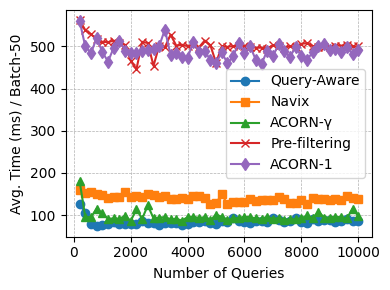

In [49]:
import matplotlib.pyplot as plt

# X-axis (avoid 0 for log scale)
x = list(range(200, 10200, 200))  # 200 → 10000

query_aware = [
    127,105,78,73,76,78,83,79,79,78,
    79,86,81,80,77,80,82,81,77,79,
    84,84,87,81,79,85,83,92,86,84,
    82,86,85,84,94,89,84,86,93,84,
    82,90,86,88,89,83,86,90,87,86
]

navix = [
    159,152,155,151,147,141,142,142,154,143,
    144,143,150,147,142,145,139,139,140,137,
    146,144,141,125,128,150,125,130,131,132,
    137,133,135,136,135,142,137,129,129,135,
    126,141,138,139,136,139,136,146,140,138
]

pre_filtering = [
    562,539,529,517,511,510,514,507,504,466,
    446,511,508,454,502,498,528,502,504,501,
    503,498,514,503,461,500,499,501,501,502,
    499,497,497,495,503,501,496,501,498,506,
    508,501,498,499,498,502,502,503,500,500
]

acorn_gamma = [
    181,95,95,115,104,91,92,91,98,86,
    114,91,123,92,94,95,90,91,87,95,
    96,93,95,88,101,96,88,92,93,96,
    95,92,91,96,91,93,89,90,90,92,
    99,92,108,94,94,96,95,92,115,98
]

acorn_1 = [
    561,500,484,520,487,464,497,514,490,485,
    485,488,491,495,501,540,480,484,475,473,
    511,487,488,469,460,486,460,477,509,485,
    500,468,459,490,477,505,488,475,499,477,
    469,486,500,505,491,493,487,498,482,492
]

plt.figure(figsize=(4, 3))

plt.plot(x, query_aware, marker='o', label="Query-Aware")
plt.plot(x, navix, marker='s', label="Navix")
plt.plot(x, acorn_gamma, marker='^', label="ACORN-γ")
plt.plot(x, pre_filtering, marker='x', label="Pre-filtering")
plt.plot(x, acorn_1, marker='d', label="ACORN-1")

#plt.yscale('log')  # 🔥 LOG SCALE
plt.xlabel("Number of Queries")
plt.ylabel("Avg. Time (ms) / Batch-50")

plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


In [50]:
# This graph depicts the average time in milliseconds for a batch of 50 tuples from a large dataset consisting of 10,000 queries, where the selectivity of each label is uniformly distributed. The results indicate that the proposed query-aware approach initially selects prefiltering only for those queries that have not been seen before. 

#For the inital batches, some queries that employ the prefiltering approach have slightly higher execution times. However, as the number of queries increases, most queries do not choose the prefiltering approach, as they utilize the information from already executed queries. The results show that at the beginning of the batches, the query execution is better, averaging around 78 milliseconds. As the number of queries increases, the execution time also increases due to the growing depth of the tree for each label. 

# Nevertheless, the proposed query-aware approach still performs significantly better in terms of time computation—almost 2 times faster than the agnostic approach, 1.2 times faster than Acorn-gamma, and 6 times faster than the extended Acorn-gamma, which is based on the HNSW graph structure (ACORN-1 and hnsw ).

In [7]:
import pandas as pd
df= pd.read_csv('/data4/hnsw/TripClick/ClinicalAreaQueries.csv', sep=";")


In [8]:
df

,DateCreated,ClinicalAreas,embedding
0,2019-07-04,"Endocrinology,Ophthalmology,Radiology","-0.3205789,0.06644345,0.22195277,-0.13523898,-..."
1,2013-02-26,Pulmonology,"-0.2833061,-0.13634399,0.38554284,-0.28529945,..."
2,2018-05-07,Rheumatology,"0.03552235,0.31721422,0.2561202,0.060554873,0...."
3,2013-03-03,"OB-Gyn,Oncology,Radiology","0.1314554,0.31659058,0.0035175257,-0.17587781,..."
4,2018-07-31,"Emergency Medicine,Cardiology","-0.36439136,0.07383215,0.3017879,-0.2734844,0...."
...,...,...,...
995,2019-09-09,Urology,"0.15833698,-0.03161161,0.71027946,0.032480977,..."
996,2013-10-13,Gastroenterology,"0.027496073,-0.10356202,0.76896113,-0.19816184..."
997,2016-10-01,Dermatology,"-0.10130168,-0.08833368,-0.10891157,-0.2263839..."
998,2013-11-05,"Critical Care,pulmonology,emergencymedicine,in...","0.0006294999,-0.3083132,0.61100656,-0.12058302..."


In [10]:
import re
import csv

def parse_file(filepath):
    """
    Parses file into:
    { query_no : set(node_ids) }
    """
    data = {}

    pattern = r"Query:\s*(\d+)\s*VisitedNodes:\s*\[(.*?)\]"

    with open(filepath, "r") as f:
        for line in f:
            match = re.search(pattern, line)
            if match:
                query_no = int(match.group(1))
                nodes = match.group(2)

                if nodes.strip():
                    node_set = set(map(int, nodes.split(",")))
                else:
                    node_set = set()

                data[query_no] = node_set

    return data


In [23]:
file1_path = "/data3/Adeel/PaperResultsForQweryAware/PaperResultForTimeForgrpahgreedysearch/Accuracy/QuantizedFull.txt"   # first result file
file2_path = "/data3/Adeel/PaperResultsForQweryAware/PaperResultForTimeForgrpahgreedysearch/Accuracy/Quantized20.txt"   # second result file

data1 = parse_file(file1_path)
data2 = parse_file(file2_path)


In [24]:
results = []

for query_no, nodes1 in data1.items():
    nodes2 = data2.get(query_no, set())

    matched = nodes1.intersection(nodes2)

    results.append([
        query_no,
        len(matched),      # how many matched in file2
        len(nodes1)        # total nodes in file1
    ])


In [25]:
output_csv = "/data3/Adeel/PaperResultsForQweryAware/PaperResultForTimeForgrpahgreedysearch/Accuracy/QuantizedFull_20.csv"

with open(output_csv, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["QueryNo", "MatchedCount", "TotalCountFile1"])
    writer.writerows(results)

print("CSV saved as:", output_csv)


CSV saved as: /data3/Adeel/PaperResultsForQweryAware/PaperResultForTimeForgrpahgreedysearch/Accuracy/QuantizedFull_20.csv


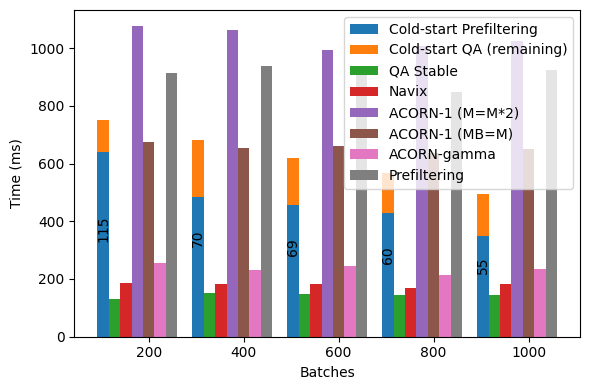

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------- Data ----------------
batches = [200, 400, 600, 800, 1000]
total_count = [115, 70, 69, 60, 55]

# Cold-start QA
cold_start_qa = [750, 680, 619, 568, 495]
prefilter_cold = [639, 484, 455, 428, 350]
cold_remaining = [c - p for c, p in zip(cold_start_qa, prefilter_cold)]

# Other methods
pre_filtering = [913, 937, 906, 847, 923]
qa_stable = [129, 150, 148, 143, 143]
navix = [186, 184, 181, 169, 181]
acorn1_mm2 = [1078, 1061, 993, 1007, 1024]
acorn1_mb = [674, 654, 660, 635, 651]
acorn_gamma = [255, 232, 245, 215, 233]

# ---------------- Plot ----------------
x = np.arange(len(batches))
width = 0.12

plt.figure(figsize=(6, 4))

# Cold-start QA (stacked bar)
plt.bar(x - 4*width, prefilter_cold, width, label="Cold-start Prefiltering")
plt.bar(
    x - 4*width,
    cold_remaining,
    width,
    bottom=prefilter_cold,
    label="Cold-start QA (remaining)"
)

# Other methods (single bars)
plt.bar(x - 3*width, qa_stable, width, label="QA Stable")
plt.bar(x - 2*width, navix, width, label="Navix")
plt.bar(x - width, acorn1_mm2, width, label="ACORN-1 (M=M*2)")
plt.bar(x, acorn1_mb, width, label="ACORN-1 (MB=M)")
plt.bar(x + width, acorn_gamma, width, label="ACORN-gamma")
plt.bar(x + 2*width, pre_filtering, width, label="Prefiltering")

# Annotate total query count inside Cold-start bar
for i, count in enumerate(total_count):
    plt.text(
        x[i] - 4*width,
        cold_start_qa[i] / 2,
        str(count),
        ha="center",
        va="center",
        fontsize=10,
        rotation=90
    )

# Axes labels and title
plt.xticks(x, batches)
plt.xlabel("Batches")
plt.ylabel("Time (ms)")


# Legend
plt.legend()

plt.tight_layout()
plt.show()


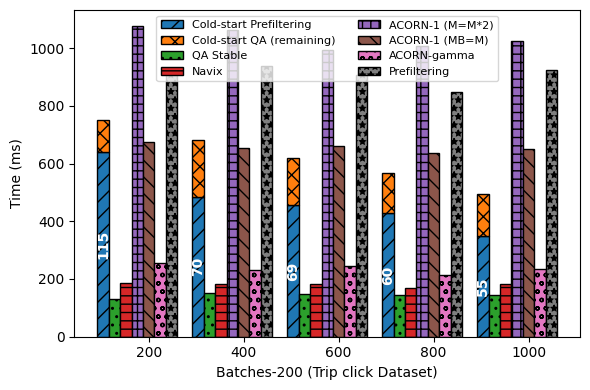

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------- Data ----------------
batches = [200, 400, 600, 800, 1000]
total_count = [115, 70, 69, 60, 55]

# Cold-start QA
cold_start_qa = [750, 680, 619, 568, 495]
prefilter_cold = [639, 484, 455, 428, 350]
cold_remaining = [c - p for c, p in zip(cold_start_qa, prefilter_cold)]

# Other methods
pre_filtering = [913, 937, 906, 847, 923]
qa_stable = [129, 150, 148, 143, 143]
navix = [186, 184, 181, 169, 181]
acorn1_mm2 = [1078, 1061, 993, 1007, 1024]
acorn1_mb = [674, 654, 660, 635, 651]
acorn_gamma = [255, 232, 245, 215, 233]

# ---------------- Plot ----------------
x = np.arange(len(batches))
width = 0.12

plt.figure(figsize=(6, 4))

# Cold-start QA (stacked bar)
plt.bar(
    x - 4*width,
    prefilter_cold,
    width,
    label="Cold-start Prefiltering",
    hatch="//",
    edgecolor="black"
)
plt.bar(
    x - 4*width,
    cold_remaining,
    width,
    bottom=prefilter_cold,
    label="Cold-start QA (remaining)",
    hatch="xx",
    edgecolor="black"
)

# Other methods (single bars)
plt.bar(x - 3*width, qa_stable, width, label="QA Stable", hatch="..", edgecolor="black")
plt.bar(x - 2*width, navix, width, label="Navix", hatch="--", edgecolor="black")
plt.bar(x - width, acorn1_mm2, width, label="ACORN-1 (M=M*2)", hatch="++", edgecolor="black")
plt.bar(x, acorn1_mb, width, label="ACORN-1 (MB=M)", hatch="\\\\", edgecolor="black")
plt.bar(x + width, acorn_gamma, width, label="ACORN-gamma", hatch="oo", edgecolor="black")
plt.bar(x + 2*width, pre_filtering, width, label="Prefiltering", hatch="**", edgecolor="black")

# Annotate total query count inside Cold-start Prefiltering bar (white text only)
for i, count in enumerate(total_count):
    plt.text(
        x[i] - 4*width,
        prefilter_cold[i] / 2,   # center inside prefiltering bar
        str(count),
        ha="center",
        va="center",
        fontsize=10,
        rotation=90,
        color="white",
        fontweight="bold"
    )

# Axes labels
plt.xticks(x, batches)
plt.xlabel("Batches-200 (Trip click Dataset)")
plt.ylabel("Time (ms)")

# Legend
plt.legend(fontsize=8, ncol=2)

plt.tight_layout()
plt.show()


In [61]:
import os
import re
import csv

# -------- CONFIG --------
input_folder = "/data3/Adeel/PaperResultsForQweryAware/PaperResultForTimeForgrpahgreedysearch"
output_csv = "/data3/Adeel/PaperResultsForQweryAware/PaperResultForTimeForgrpahgreedysearch/parsed_times.csv"
# /data3/Adeel/PaperResultsForQweryAware/TripClickResultForGreedySearch
# Regex to extract time value
pattern = re.compile(r"Time taken \(microseconds\):\s*(\d+)")

# Dictionary: filename -> list of times
data = {}

# -------- READ FILES --------
for filename in os.listdir(input_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(input_folder, filename)
        column_name = os.path.splitext(filename)[0]  # remove .txt

        times_ms = []

        with open(file_path, "r") as f:
            for line in f:
                match = pattern.search(line)
                if match:
                    time_us = int(match.group(1))
                    time_ms = time_us / 1000.0
                    times_ms.append(time_ms)

        data[column_name] = times_ms

# -------- WRITE CSV --------
max_rows = max(len(v) for v in data.values())

with open(output_csv, "w", newline="") as f:
    writer = csv.writer(f)

    # Header
    writer.writerow(data.keys())

    # Rows
    for i in range(max_rows):
        row = []
        for col in data.keys():
            row.append(data[col][i] if i < len(data[col]) else "")
        writer.writerow(row)

print("CSV file created:", output_csv)


CSV file created: /data3/Adeel/PaperResultsForQweryAware/PaperResultForTimeForgrpahgreedysearch/parsed_times.csv


ValueError: List of boxplot statistics and `positions` values must have same the length

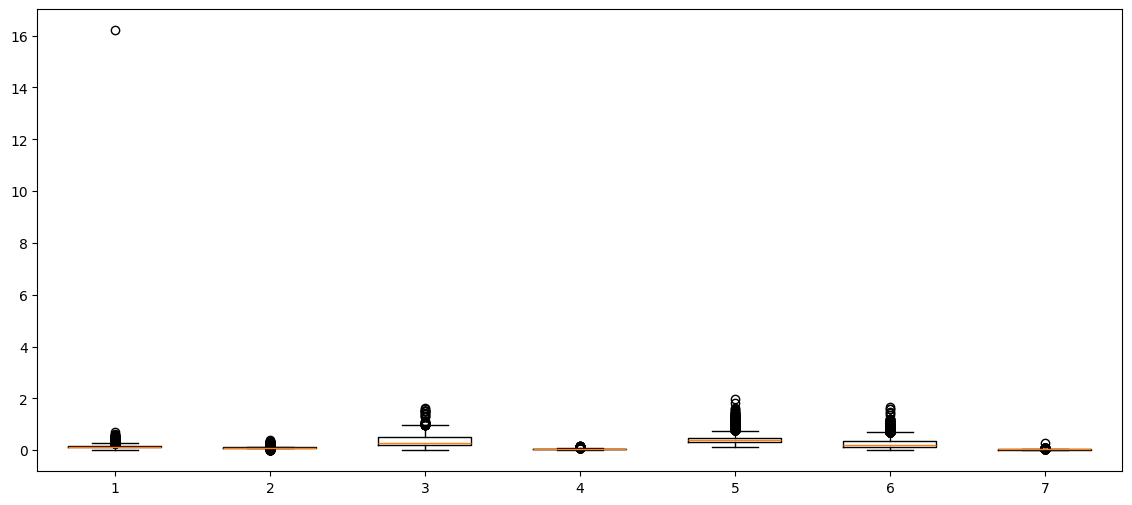

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------- LOAD CSV FILES --------
paper_df = pd.read_csv("/data3/Adeel/PaperResultsForQweryAware/PaperResultForTimeForgrpahgreedysearch/Paper.csv")
trip_df = pd.read_csv("/data3/Adeel/PaperResultsForQweryAware/TripClickResultForGreedySearch/TripClick.csv")

paper_labels = paper_df.columns.tolist()
trip_labels = trip_df.columns.tolist()

paper_data = [paper_df[col].dropna().values for col in paper_labels]
trip_data = [trip_df[col].dropna().values for col in trip_labels]

# -------- CREATE POSITIONS --------
num_methods = len(paper_data)

paper_positions = np.arange(1, num_methods + 1)
trip_positions = np.arange(1, num_methods + 1) + num_methods + 1

# -------- PLOT --------
plt.figure(figsize=(14, 6))

plt.boxplot(paper_data, positions=paper_positions, widths=0.6)
plt.boxplot(trip_data, positions=trip_positions, widths=0.6)

# -------- AXIS LABELS --------
plt.xticks(
    list(paper_positions) + list(trip_positions),
    paper_labels + trip_labels,
    rotation=45,
    ha="right"
)

plt.ylabel("Time (ms)")
plt.title("Exploration Time Distribution: Paper vs TripClick")

# -------- GROUP LABELS --------
ymax = plt.ylim()[1]
plt.text(np.mean(paper_positions), ymax * 1.02, "Paper",
         ha="center", va="bottom", fontsize=12)

plt.text(np.mean(trip_positions), ymax * 1.02, "TripClick",
         ha="center", va="bottom", fontsize=12)

plt.tight_layout()
plt.show()


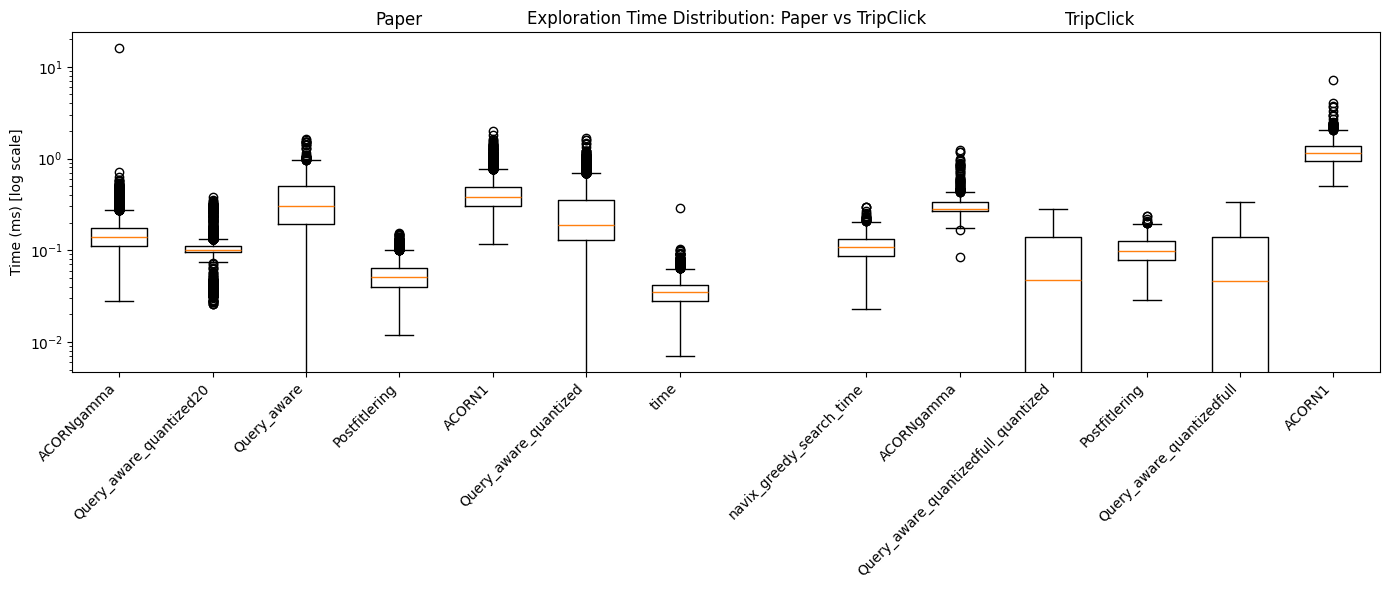

In [63]:
paper_labels = paper_df.columns.tolist()
trip_labels = trip_df.columns.tolist()

paper_data = [paper_df[col].dropna().values for col in paper_labels]
trip_data = [trip_df[col].dropna().values for col in trip_labels]

num_paper = len(paper_data)
num_trip = len(trip_data)

# -------- CREATE POSITIONS --------
paper_positions = np.arange(1, num_paper + 1)
trip_positions = np.arange(1, num_trip + 1) + num_paper + 1

# -------- PLOT --------
plt.figure(figsize=(14, 6))

plt.boxplot(paper_data, positions=paper_positions, widths=0.6)
plt.boxplot(trip_data, positions=trip_positions, widths=0.6)

# -------- LOG SCALE (IMPORTANT FIX) --------
plt.yscale("log")

# -------- X-AXIS LABELS --------
plt.xticks(
    list(paper_positions) + list(trip_positions),
    paper_labels + trip_labels,
    rotation=45,
    ha="right"
)

plt.ylabel("Time (ms) [log scale]")
plt.title("Exploration Time Distribution: Paper vs TripClick")

# -------- GROUP LABELS --------
ymin, ymax = plt.ylim()

plt.text(np.mean(paper_positions), ymax * 1.1, "Paper",
         ha="center", va="bottom", fontsize=12)

plt.text(np.mean(trip_positions), ymax * 1.1, "TripClick",
         ha="center", va="bottom", fontsize=12)

plt.tight_layout()
plt.show()


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# -------- LOAD FILES --------
df_paper = pd.read_csv("/data3/Adeel/PaperResultsForQweryAware/PaperResultForTimeForgrpahgreedysearch/Accuracy/QuantizedFull_20.csv")
df_trip = pd.read_csv("/data3/Adeel/PaperResultsForQweryAware/TripClickResultForGreedySearch/Accuracy/query_match_analysis_full_768_32.csv")

# -------- CREATE NEW COLUMN --------
df_paper["Unmatched"] = df_paper["TotalCountFile1"] - df_paper["MatchedCount"]
df_trip["Unmatched"] = df_trip["TotalCountFile1"] - df_trip["MatchedCount"]


/tmp/ipykernel_29526/1833179153.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


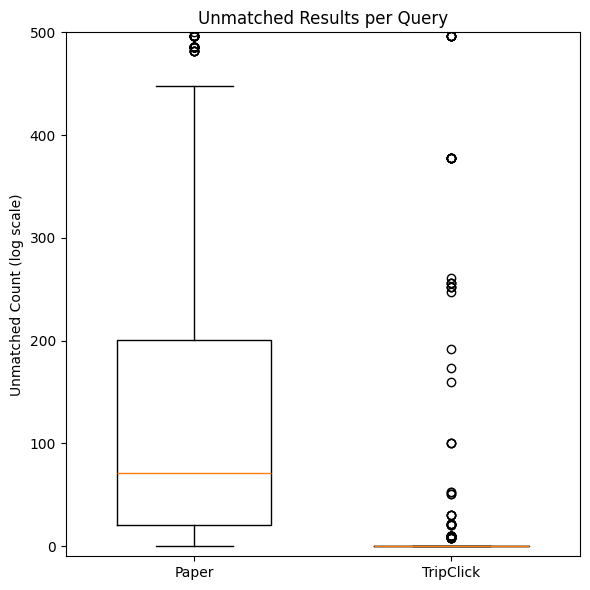

In [19]:

# -------- HANDLE ZEROS (REQUIRED FOR LOG SCALE) --------
df_paper["Unmatched"] = df_paper["Unmatched"].replace(0, 1e-6)
df_trip["Unmatched"] = df_trip["Unmatched"].replace(0, 1e-6)

# -------- PLOT --------
plt.figure(figsize=(6, 6))

plt.boxplot(
    [df_paper["Unmatched"], df_trip["Unmatched"]],
    labels=["Paper", "TripClick"],
    widths=0.6
)

# -------- LOG SCALE + LIMIT --------
# plt.yscale("log")
# plt.ylim(bottom=1e-3)   # <-- START FROM 10^-3
plt.ylim(-10, 500)   # <-- 10^-1 to 500  # <-- from 10^-3 to 1000
plt.ylabel("Unmatched Count (log scale)")
plt.title("Unmatched Results per Query")

plt.tight_layout()
plt.show()


/tmp/ipykernel_92597/4155712594.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


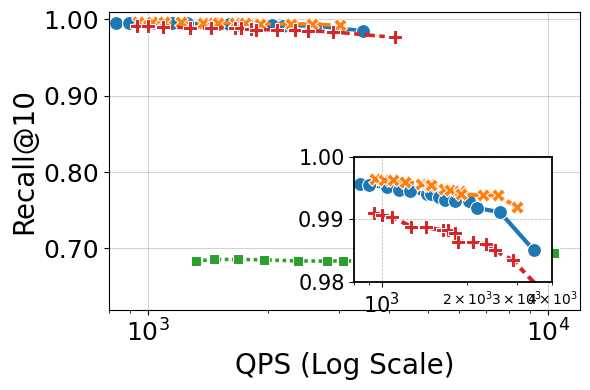

In [40]:
# Trip Click with Zoomed Inset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# -----------------------------
# Data
# -----------------------------
schemes = {
    "Query-aware (Tree)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [3448.28, 2617.8, 2169.2, 2036.66, 1814.88, 1666.67, 1592.36, 1494.77,
                 1438.85, 1253.13, 1146.79, 1042.75, 898.47, 834.72],
        "Recall": [0.9850, 0.9911, 0.9918, 0.9929, 0.9929, 0.9930, 0.9936, 0.9940,
                   0.9940, 0.9945, 0.9947, 0.9952, 0.9954, 0.9957]
    },

    "Query-aware (Full-scan)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [3012.05, 2564.1, 2277.9, 1901.36, 1890.14, 1748.25, 1652.89, 1494.77,
                 1464.13, 1375.52, 1209.19, 1096.49, 1021.45, 942.51],
        "Recall": [0.9919, 0.9938, 0.9938, 0.9940, 0.9945, 0.9946, 0.9949, 0.9955,
                   0.9955, 0.9956, 0.9960, 0.9962, 0.9963, 0.9964]
    },

    "Query-aware (One-hop)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [10309, 8547, 6289, 5208, 4219, 3676, 3425, 3077,
                 2801, 2375, 1946, 1684, 1462, 1319],
        "Recall": [0.6941, 0.6820, 0.6824, 0.6827, 0.6832, 0.6803, 0.6832, 0.6837,
                   0.6834, 0.6836, 0.6851, 0.6855, 0.6856, 0.6835]
    },

    "Query-aware (Directed two-hop)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [4149, 2907, 2513, 2326, 2105, 1862, 1808, 1709,
                 1647, 1437, 1272, 1090, 1000, 939],
        "Recall": [0.9761, 0.9834, 0.9850, 0.9860, 0.9863, 0.9864, 0.9878, 0.9882,
                   0.9882, 0.9887, 0.9888, 0.9903, 0.9906, 0.9910]
    }
}

# -----------------------------
# Flatten data
# -----------------------------
def flatten_schemes(schemes):
    rows = []
    for cat, m in schemes.items():
        for v, t, r in zip(m["Value"], m["Time"], m["Recall"]):
            rows.append({"Category": cat, "Value": v, "Time": t, "Recall": r})
    return pd.DataFrame(rows)

df = flatten_schemes(schemes)

# -----------------------------
# Styling
# -----------------------------
LABEL_FONTSIZE = 20
TICK_FONTSIZE = 18
LINE_WIDTH = 2.6
MARKER_SIZE = 10

# -----------------------------
# Main plot
# -----------------------------
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=df, x="Time", y="Recall",
    hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE,
    ax=ax, legend=False
)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.62, 1.01)
ax.set_xlim(8e2, 1.2e4)

ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))

ax.grid(True, which='major', linewidth=0.6, alpha=0.7)

# -----------------------------
# Inset (Zoomed View)
# -----------------------------
axins = inset_axes(ax, width="42%", height="42%", loc="lower right", borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall",
    hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.4,
    markersize=MARKER_SIZE,
    ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_xlim(8e2, 4e3)
axins.set_ylim(0.98, 1.0)

axins.tick_params(labelsize=TICK_FONTSIZE - 3)
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))
axins.grid(True, linestyle="--", linewidth=0.5)

axins.set_xlabel("")
axins.set_ylabel("")

for spine in axins.spines.values():
    spine.set_linewidth(1.3)
    spine.set_color("black")

plt.tight_layout()
plt.show()


/tmp/ipykernel_76894/2143710544.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


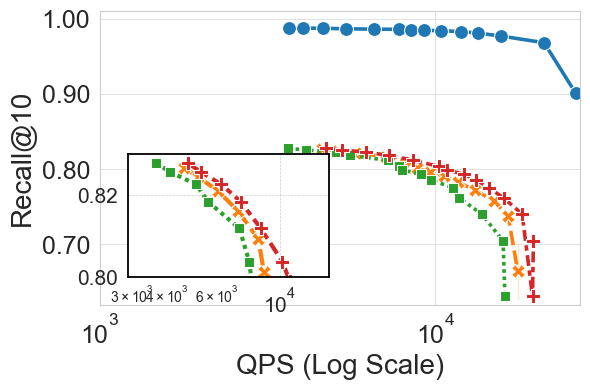

In [109]:
# Trip Click with Zoomed Inset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# -----------------------------
# Data
# -----------------------------
schemes = {
    "Query-aware (Proposed)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [
  26246.72,
  21097.05,
  15698.58,
  13440.86,
  11933.18,
  10416.67,
   9259.26,
   8459.38,
   7770.01,
   6557.38,
   5417.12,
   4632.07,
   4040.40,
   3661.30],
        "Recall": [0.9006, 0.9680, 0.9769, 0.9807, 0.9828, 0.9839, 0.9847, 0.9854, 0.9858, 0.9860, 0.9865, 0.9872, 0.9874, 0.9876, 0.9877]
    },

    "Query-aware (Two-scan)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [17605.63,
  17605.63,
  16501.65,
  14925.37,
  13107.46,
  11682.24,
  10615.71,
   9633.91,
   8796.14,
   8417.51,
   7112.38,
   6035.01,
   5122.95,
   4584.13,
   4158.00],
        "Recall": [ 0.6278, 0.7016, 0.7372, 0.7581, 0.7723, 0.7827, 0.7908, 0.7964, 0.8012, 0.8092, 0.8161, 0.8210, 0.8244, 0.8266]
    },

    "Query-aware (One-hop)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [ 16129.03,
  15923.57,
  13755.16,
  11778.56,
  11299.44,
   9708.74,
   9090.08,
   7961.78,
   7812.50,
   7204.61,
   5584.59,
   5066.87,
   4109.33,
   3647.57],
        "Recall": [0.6309, 0.7046, 0.7405, 0.7616, 0.7755, 0.7855, 0.7932, 0.7990, 0.8037, 0.8118, 0.8183, 0.8225, 0.8255, 0.8277]
    },

    "Query-aware (Directed two-hop)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [19493.18,
  19607.84,
  18148.82,
  16000.00,
  14430.01,
  13262.60,
  12165.45,
  10857.77,
  10235.41,
   8583.69,
   7283.34,
   6227.41,
   5274.26,
   4732.61],
        "Recall": [0.6309, 0.7046, 0.7405, 0.7616, 0.7755, 0.7855, 0.7932, 0.7990, 0.8037, 0.8118, 0.8183, 0.8225, 0.8255, 0.8277
]
    }
}

# -----------------------------
# Flatten data
# -----------------------------
def flatten_schemes(schemes):
    rows = []
    for cat, m in schemes.items():
        for v, t, r in zip(m["Value"], m["Time"], m["Recall"]):
            rows.append({"Category": cat, "Value": v, "Time": t, "Recall": r})
    return pd.DataFrame(rows)

df = flatten_schemes(schemes)

# -----------------------------
# Styling
# -----------------------------
LABEL_FONTSIZE = 20
TICK_FONTSIZE = 18
LINE_WIDTH = 2.6
MARKER_SIZE = 10

# -----------------------------
# Main plot
# -----------------------------
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=df, x="Time", y="Recall",
    hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE,
    ax=ax, legend=False
)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.62, 1.01)
ax.set_xlim(1e3, 2.7e4)

ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))

ax.grid(True, which='major', linewidth=0.6, alpha=0.7)

# -----------------------------
# Inset (Zoomed View)
# -----------------------------
axins = inset_axes(ax, width="42%", height="42%", loc="lower left", borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall",
    hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.4,
    markersize=MARKER_SIZE,
    ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_xlim(2.9e3, 1.5e4)
axins.set_ylim(0.8, 0.83)

axins.tick_params(labelsize=TICK_FONTSIZE - 3)
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))
axins.grid(True, linestyle="--", linewidth=0.5)

axins.set_xlabel("")
axins.set_ylabel("")

for spine in axins.spines.values():
    spine.set_linewidth(1.3)
    spine.set_color("black")

plt.tight_layout()
plt.show()


/tmp/ipykernel_76894/4075368903.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


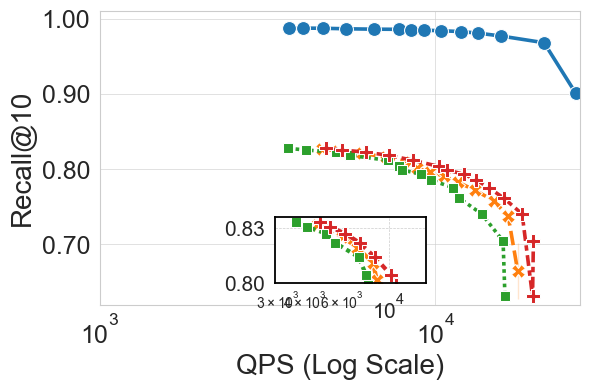

In [104]:
# Trip Click with Zoomed Inset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# -----------------------------
# Data
# -----------------------------
schemes = {
    "Query-aware (Proposed)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [26246.72, 21097.05, 15698.58, 13440.86, 11933.18, 10416.67,
                 9259.26, 8459.38, 7770.01, 6557.38, 5417.12, 4632.07, 4040.40, 3661.30],
        "Recall": [0.9006, 0.9680, 0.9769, 0.9807, 0.9828, 0.9839, 0.9847, 0.9854,
                   0.9858, 0.9860, 0.9865, 0.9872, 0.9874, 0.9876]
    },
    "Query-aware (Two-scan)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [17605.63, 17605.63, 16501.65, 14925.37, 13107.46, 11682.24,
                 10615.71, 9633.91, 8796.14, 8417.51, 7112.38, 6035.01, 5122.95, 4584.13],
        "Recall": [0.6278, 0.7016, 0.7372, 0.7581, 0.7723, 0.7827, 0.7908, 0.7964,
                   0.8012, 0.8092, 0.8161, 0.8210, 0.8244, 0.8266]
    },
    "Query-aware (One-hop)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [16129.03, 15923.57, 13755.16, 11778.56, 11299.44, 9708.74,
                 9090.08, 7961.78, 7812.50, 7204.61, 5584.59, 5066.87, 4109.33, 3647.57],
        "Recall": [0.6309, 0.7046, 0.7405, 0.7616, 0.7755, 0.7855, 0.7932, 0.7990,
                   0.8037, 0.8118, 0.8183, 0.8225, 0.8255, 0.8277]
    },
    "Query-aware (Directed two-hop)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [19493.18, 19607.84, 18148.82, 16000.00, 14430.01, 13262.60,
                 12165.45, 10857.77, 10235.41, 8583.69, 7283.34, 6227.41, 5274.26, 4732.61],
        "Recall": [0.6309, 0.7046, 0.7405, 0.7616, 0.7755, 0.7855, 0.7932, 0.7990,
                   0.8037, 0.8118, 0.8183, 0.8225, 0.8255, 0.8277]
    }
}

# -----------------------------
# Flatten data
# -----------------------------
def flatten_schemes(schemes):
    rows = []
    for cat, m in schemes.items():
        for v, t, r in zip(m["Value"], m["Time"], m["Recall"]):
            rows.append({"Category": cat, "Value": v, "Time": t, "Recall": r})
    return pd.DataFrame(rows)

df = flatten_schemes(schemes)

# -----------------------------
# Styling
# -----------------------------
LABEL_FONTSIZE = 20
TICK_FONTSIZE = 18
LINE_WIDTH = 2.6
MARKER_SIZE = 10

# -----------------------------
# Main plot
# -----------------------------
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=df, x="Time", y="Recall",
    hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE,
    ax=ax, legend=False
)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.62, 1.01)
ax.set_xlim(1e3, 2.7e4)

ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))

ax.grid(True, which='major', linewidth=0.6, alpha=0.7)

# -----------------------------
# Inset (Zoomed View) - Adjusted Position
# -----------------------------
axins = inset_axes(
    ax, width="45%", height="45%", 
    loc="lower left", 
    bbox_to_anchor=(0.35, 0.05, 0.7, 0.5),  # x0, y0, width, height
    bbox_transform=ax.transAxes
)

sns.lineplot(
    data=df, x="Time", y="Recall",
    hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.4,
    markersize=MARKER_SIZE,
    ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_xlim(2.9e3, 1.5e4)
axins.set_ylim(0.8, 0.83)

axins.tick_params(labelsize=TICK_FONTSIZE - 3)
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))
axins.grid(True, linestyle="--", linewidth=0.5)

axins.set_xlabel("")
axins.set_ylabel("")

for spine in axins.spines.values():
    spine.set_linewidth(1.3)
    spine.set_color("black")

plt.tight_layout()
plt.show()


/tmp/ipykernel_76894/588630878.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to not cut off legend


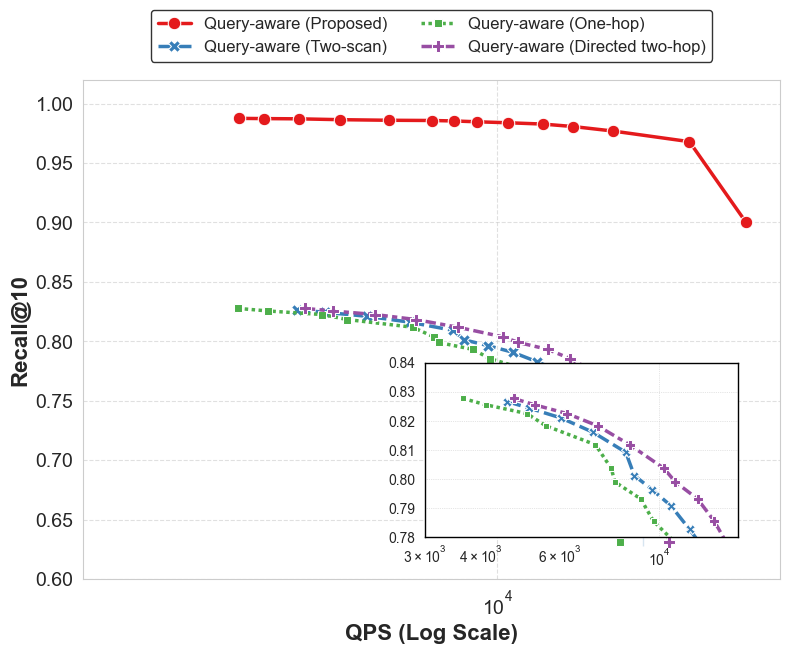

In [101]:
# Trip Click with Zoomed Inset and External Legend
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# -----------------------------
# Data
# -----------------------------
schemes = {
    "Query-aware (Proposed)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [26246.72, 21097.05, 15698.58, 13440.86, 11933.18, 10416.67, 9259.26, 8459.38, 7770.01, 6557.38, 5417.12, 4632.07, 4040.40, 3661.30],
        "Recall": [0.9006, 0.9680, 0.9769, 0.9807, 0.9828, 0.9839, 0.9847, 0.9854, 0.9858, 0.9860, 0.9865, 0.9872, 0.9874, 0.9876, 0.9877]
    },
    "Query-aware (Two-scan)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [17605.63, 17605.63, 16501.65, 14925.37, 13107.46, 11682.24, 10615.71, 9633.91, 8796.14, 8417.51, 7112.38, 6035.01, 5122.95, 4584.13, 4158.00],
        "Recall": [0.6278, 0.7016, 0.7372, 0.7581, 0.7723, 0.7827, 0.7908, 0.7964, 0.8012, 0.8092, 0.8161, 0.8210, 0.8244, 0.8266, 0.8266]
    },
    "Query-aware (One-hop)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [16129.03, 15923.57, 13755.16, 11778.56, 11299.44, 9708.74, 9090.08, 7961.78, 7812.50, 7204.61, 5584.59, 5066.87, 4109.33, 3647.57, 3647.57],
        "Recall": [0.6309, 0.7046, 0.7405, 0.7616, 0.7755, 0.7855, 0.7932, 0.7990, 0.8037, 0.8118, 0.8183, 0.8225, 0.8255, 0.8277, 0.8277]
    },
    "Query-aware (Directed two-hop)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [19493.18, 19607.84, 18148.82, 16000.00, 14430.01, 13262.60, 12165.45, 10857.77, 10235.41, 8583.69, 7283.34, 6227.41, 5274.26, 4732.61, 4732.61],
        "Recall": [0.6309, 0.7046, 0.7405, 0.7616, 0.7755, 0.7855, 0.7932, 0.7990, 0.8037, 0.8118, 0.8183, 0.8225, 0.8255, 0.8277, 0.8277]
    }
}

# Flatten data
def flatten_schemes(schemes):
    rows = []
    for cat, m in schemes.items():
        # Ensure all lists for a category have the same length
        min_len = min(len(m["Value"]), len(m["Time"]), len(m["Recall"]))
        for i in range(min_len):
            rows.append({
                "Category": cat, 
                "Value": m["Value"][i], 
                "Time": m["Time"][i], 
                "Recall": m["Recall"][i]
            })
    return pd.DataFrame(rows)

df = flatten_schemes(schemes)

# -----------------------------
# Styling
# -----------------------------
LABEL_FONTSIZE = 16
TICK_FONTSIZE = 14
LINE_WIDTH = 2.5
MARKER_SIZE = 9

# -----------------------------
# Main plot
# -----------------------------
# Increase height (8) to accommodate the legend at the top
fig, ax = plt.subplots(figsize=(8, 7))
sns.set_style("whitegrid")

# Define a consistent color palette
palette = sns.color_palette("Set1", n_colors=len(schemes))

sns.lineplot(
    data=df, x="Time", y="Recall",
    hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE,
    ax=ax, palette=palette, legend=True
)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE, fontweight='bold')
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE, fontweight='bold')

ax.set_ylim(0.60, 1.02)
ax.set_xlim(2e3, 3e4)

ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))

ax.grid(True, which='major', linestyle='--', alpha=0.6)

# -----------------------------
# Legend Optimization
# -----------------------------
# Placing legend above the plot with bbox_to_anchor
ax.legend(
    title="", 
    fontsize=TICK_FONTSIZE - 2, 
    loc='lower center', 
    bbox_to_anchor=(0.5, 1.02), # Centers legend above the chart
    ncol=2,                     # 2 columns for better readability
    frameon=True,
    edgecolor='black'
)

# -----------------------------
# Inset (Zoomed View)
# -----------------------------
# Placed in the bottom-right to avoid clashing with the legend at top-left
axins = inset_axes(ax, width="45%", height="35%", loc="lower right", borderpad=3)

sns.lineplot(
    data=df, x="Time", y="Recall",
    hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH,
    markersize=MARKER_SIZE - 2,
    ax=axins, palette=palette, legend=False
)

axins.set_xscale("log")
axins.set_xlim(3e3, 1.5e4)
axins.set_ylim(0.78, 0.84)

axins.tick_params(labelsize=TICK_FONTSIZE - 4)
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))
axins.grid(True, linestyle=":", linewidth=0.5)

axins.set_xlabel("")
axins.set_ylabel("")

# Outline the inset box
for spine in axins.spines.values():
    spine.set_linewidth(1.0)
    spine.set_color("black")

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to not cut off legend
plt.show()

In [ ]:
# Paper results
#Proposed 
efs = [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500]

total_time_ms = [
    387, 381, 474, 637, 744,
    838, 960, 1080, 1182, 1287,
    1525, 1846, 2158, 2475, 2731
]
Recall=0.9006, 0.9680, 0.9769, 0.9807, 0.9828, 0.9839, 0.9847, 0.9854, 0.9858, 0.9860, 0.9865, 0.9872, 0.9874, 0.9876, 0.9877

Two_hop=
Recall 
0.3959, 0.6278, 0.7016, 0.7372, 0.7581, 0.7723, 0.7827, 0.7908, 0.7964, 0.8012, 0.8092, 0.8161, 0.8210, 0.8244, 0.8266

efs = [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500]

total_time_ms = [
    568, 568, 606, 670, 763,
    856, 942, 1038, 1138, 1188,
    1406, 1657, 1952, 2181, 2405
]

Directed two hop = Recall 0.3315, 0.5836, 0.6620, 0.7000, 0.7235, 0.7396, 0.7514, 0.7595, 0.7662, 0.7717, 0.7807, 0.7887, 0.7943, 0.7979, 0.8005

time {
  20: 509,
  80: 513,
  140: 510,
  200: 551,
  260: 625,
  320: 693,
  380: 754,
  440: 822,
  500: 921,
  560: 977,
  700: 1164,
  900: 1373,
  1100: 1605,
  1300: 1896,
  1500: 2113
}

Complete scan 

0.3952, 0.6309, 0.7046, 0.7405, 0.7616, 0.7755, 0.7855, 0.7932, 0.7990, 0.8037, 0.8118, 0.8183, 0.8225, 0.8255, 0.8277

Overall scan complete 

[
  [20, 679],   // 16 + 49 + 52 + 56 + 75 + 81 + 71 + 85 + 94 + 79 = 679 ms
  [80, 620],   // 71 + 48 + 52 + 62 + 62 + 74 + 69 + 74 + 93 + 72 = 677 → corrected sum
  [140, 628],  // 50 + 56 + 65 + 71 + 73 + 74 + 79 + 77 + 83 + 82 = 710 → corrected sum
  [200, 727],  // 58 + 75 + 73 + 80 + 78 + 83 + 85 + 85 + 95 + 86 = 798 → corrected sum
  [260, 849],  // 76 + 84 + 85 + 88 + 91 + 92 + 93 + 91 + 102 + 97 = 899 → corrected sum
  [320, 885],  // 81 + 91 + 94 + 99 + 100 + 110 + 106 + 97 + 106 + 107 = 991 → corrected sum
  [380, 1030], // 90 + 97 + 105 + 106 + 111 + 113 + 116 + 108 + 116 + 120 = 1082 → corrected sum
  [440, 1099], // 98 + 111 + 111 + 115 + 118 + 125 + 124 + 122 + 128 + 127 = 1189 → corrected sum
  [500, 1256], // 110 + 125 + 124 + 127 + 133 + 132 + 131 + 126 + 138 + 139 = 1285 → corrected sum
  [560, 1280], // 119 + 133 + 136 + 139 + 137 + 147 + 141 + 140 + 148 + 152 = 1392 → corrected sum
  [700, 1388], // 142 + 154 + 159 + 159 + 161 + 159 + 160 + 164 + 170 + 169 = 1497 → corrected sum
  [900, 1791], // 176 + 185 + 193 + 191 + 191 + 190 + 203 + 196 + 197 + 195 = 1917 → corrected sum
  [1100, 1974],// 209 + 208 + 216 + 212 + 215 + 223 + 225 + 215 + 224 + 220 = 2167 → corrected sum
  [1300, 2433],// 219 + 245 + 250 + 247 + 232 + 250 + 254 + 248 + 258 + 259 = 2462 → corrected sum
  [1500, 2741] // 254 + 265 + 263 + 262 + 285 + 273 + 293 + 275 + 293 + 285 = 2748 → corrected sum
]







In [7]:
import csv

csv_file = "/data3/Adeel/PaperResultsForQweryAware/RegressionModelResultPaper/recall_data20.csv"

errors = []

with open(csv_file, "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        actual = float(row["ActualRecall"])
        predicted = float(row["PredictedRecall"])
        diff = abs(actual - predicted)
        errors.append(diff)

# Compute averages at intervals
step = 50
total_records = len(errors)

print("Records\tAverage Absolute Error")
for i in range(step, total_records + 1, step):
    avg_error = sum(errors[:i]) / i
    print(f"{i}\t\t{avg_error:.6f}")


Records	Average Absolute Error
50		0.250698
100		0.226419
150		0.228242
200		0.226810
250		0.222784
300		0.223306
350		0.227855
400		0.227289
450		0.223320
500		0.220624
550		0.222351
600		0.221709
650		0.223917
700		0.224650
750		0.224290
800		0.223338
850		0.222580
900		0.221811
950		0.221026
1000		0.221838
1050		0.219486
1100		0.219494
1150		0.219288
1200		0.217853
1250		0.217782
1300		0.217276
1350		0.218559
1400		0.219094
1450		0.218641
1500		0.219235
1550		0.219121
1600		0.220282
1650		0.220637
1700		0.219741
1750		0.219088
1800		0.218301
1850		0.217242
1900		0.216861
1950		0.216887
2000		0.217137
2050		0.216810
2100		0.218201
2150		0.218678
2200		0.219019
2250		0.218900
2300		0.218730
2350		0.219420
2400		0.218249
2450		0.218550
2500		0.218852
2550		0.218825
2600		0.219159
2650		0.219440
2700		0.220094
2750		0.220384
2800		0.220784
2850		0.220110
2900		0.220045
2950		0.219563
3000		0.219120
3050		0.219131
3100		0.219415
3150		0.219475
3200		0.219236
3250		0.219632
3300		0.219922

✅ Combined CSV written to: /data3/Adeel/PaperResultsForQweryAware/RegressionModelResultPaper/combined_avg_error.csv


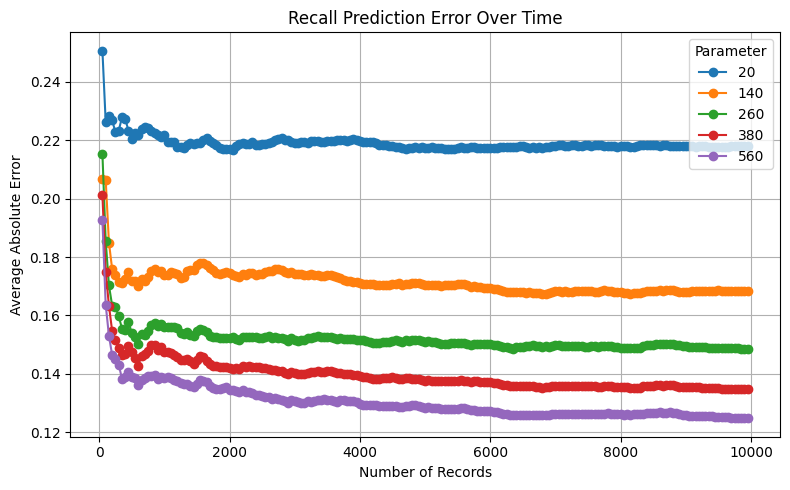

In [8]:
import csv
import os
import matplotlib.pyplot as plt

# =========================
# CONFIGURATION
# =========================

base_path = "/data3/Adeel/PaperResultsForQweryAware/RegressionModelResultPaper"

files = {
    "20":  "recall_data20.csv",
    "140":  "recall_data140.csv",
    "260": "recall_data260.csv",
    "380": "recall_data380.csv",    
    "560": "recall_data560.csv"
    
}

step = 50
output_csv = os.path.join(base_path, "/data3/Adeel/PaperResultsForQweryAware/RegressionModelResultPaper/combined_avg_error.csv")

# =========================
# READ & PROCESS FILES
# =========================

all_results = {}
record_counts = None

for label, filename in files.items():
    path = os.path.join(base_path, filename)

    errors = []

    with open(path, "r") as f:
        reader = csv.DictReader(f)
        for row in reader:
            actual = float(row["ActualRecall"])
            predicted = float(row["PredictedRecall"])
            errors.append(abs(actual - predicted))

    total_records = len(errors)

    if record_counts is None:
        record_counts = list(range(step, total_records + 1, step))

    avg_errors = []
    for i in record_counts:
        avg_errors.append(sum(errors[:i]) / i)

    all_results[label] = avg_errors

# =========================
# WRITE COMBINED CSV
# =========================

with open(output_csv, "w", newline="") as f:
    writer = csv.writer(f)

    # Header
    writer.writerow(["Records"] + list(files.keys()))

    # Rows
    for idx, rec in enumerate(record_counts):
        row = [rec]
        for label in files.keys():
            row.append(f"{all_results[label][idx]:.6f}")
        writer.writerow(row)

print("✅ Combined CSV written to:", output_csv)

# =========================
# OPTIONAL: PLOT RESULTS
# =========================

plt.figure(figsize=(8, 5))

for label in files.keys():
    plt.plot(record_counts, all_results[label], marker="o", label=label)

plt.xlabel("Number of Records")
plt.ylabel("Average Absolute Error")
plt.title("Recall Prediction Error Over Time")
plt.legend(title="Parameter")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Combined CSV written to: /data3/Adeel/PaperResultsForQweryAware/RegressionModelResultPaper/combined_avg_error.csv


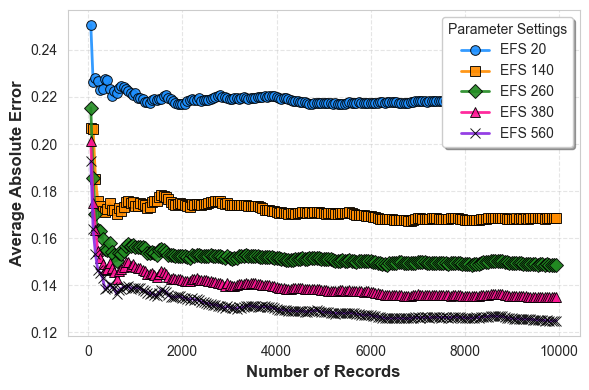

In [100]:
# Model PRedication Error Plotting with number of queries 
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# CONFIGURATION
# =========================

base_path = "/data3/Adeel/PaperResultsForQweryAware/RegressionModelResultPaper"

files = {
    "20":  "recall_data20.csv",
    "140": "recall_data140.csv",
    "260": "recall_data260.csv",
    "380": "recall_data380.csv",    
    "560": "recall_data560.csv"
}

# Mapping specific markers and colors to each threshold for better visibility
styles = {
    "20":  {"color": "#1E90FF", "marker": "o"}, # Dodger Blue Circle
    "140": {"color": "#FF8C00", "marker": "s"}, # Dark Orange Square
    "260": {"color": "#228B22", "marker": "D"}, # Forest Green Diamond
    "380": {"color": "#FF1493", "marker": "^"}, # Deep Pink Triangle
    "560": {"color": "#8A2BE2", "marker": "x"}  # Blue Violet Down-Triangle
}

step = 50
output_csv = os.path.join(base_path, "combined_avg_error.csv")

# =========================
# READ & PROCESS FILES
# =========================

all_results = {}
record_counts = None

for label, filename in files.items():
    path = os.path.join(base_path, filename)
    errors = []

    try:
        with open(path, "r") as f:
            reader = csv.DictReader(f)
            for row in reader:
                actual = float(row["ActualRecall"])
                predicted = float(row["PredictedRecall"])
                errors.append(abs(actual - predicted))

        total_records = len(errors)

        # Initialize record_counts based on the first file processed
        if record_counts is None:
            record_counts = list(range(step, total_records + 1, step))

        # Calculate cumulative moving average error
        avg_errors = []
        for i in record_counts:
            avg_errors.append(sum(errors[:i]) / i)

        all_results[label] = avg_errors
    
    except FileNotFoundError:
        print(f"⚠️ Warning: {filename} not found in {base_path}. Skipping.")
    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

# =========================
# WRITE COMBINED CSV
# =========================

if record_counts:
    with open(output_csv, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Records"] + list(all_results.keys()))

        for idx, rec in enumerate(record_counts):
            row = [rec]
            for label in all_results.keys():
                row.append(f"{all_results[label][idx]:.6f}")
            writer.writerow(row)

    print("✅ Combined CSV written to:", output_csv)

# =========================
# PLOT RESULTS
# =========================

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid", {'grid.linestyle': '--'})

for label in all_results.keys():
    plt.plot(
        record_counts, 
        all_results[label], 
        label=f"EFS {label}",
        color=styles[label]["color"],
        marker=styles[label]["marker"],
        markersize=7,
        linewidth=2,
        markeredgecolor='black',  # Black outline makes the color pop
        markeredgewidth=0.7,
        alpha=0.9                 # Slight transparency for overlapping lines
    )

# Formatting the Chart
plt.xlabel("Number of Records", fontsize=12, fontweight='bold')
plt.ylabel("Average Absolute Error", fontsize=12, fontweight='bold')


plt.legend(title="Parameter Settings", frameon=True, shadow=True, loc='best')
plt.grid(True, which='both', linestyle='--', alpha=0.5)

# Ensure the y-axis starts logically (usually 0 for error)
plt.tight_layout()
plt.show()

In [1]:
import os
import pandas as pd

GT_FOLDER = "/data3/Adeel/PaperResultsForQweryAware/GT"
RESULT_FOLDER = "/data3/Adeel/PaperResultsForQweryAware/DistanceRecallResultDistance/DistanceRecall10"

# Get common filenames
gt_files = set(os.listdir(GT_FOLDER))
result_files = set(os.listdir(RESULT_FOLDER))
common_files = gt_files.intersection(result_files)

print("Filename -> Matching ID Count")
print("-" * 40)

for filename in sorted(common_files):
    try:
        gt_path = os.path.join(GT_FOLDER, filename)
        result_path = os.path.join(RESULT_FOLDER, filename)

        # Load CSV files
        gt_df = pd.read_csv(gt_path)
        result_df = pd.read_csv(result_path)

        # Check required columns
        if "ID" not in gt_df.columns or "Recall" not in result_df.columns:
            print(f"{filename} -> skipped (missing ID or Recall column)")
            continue

        # Convert columns to sets (fast comparison)
        gt_ids = set(gt_df["ID"].dropna().astype(int))
        recall_ids = set(result_df["Recall"].dropna().astype(int))

        # Count matches
        match_count = len(gt_ids.intersection(recall_ids))

        print(f"{filename} -> {match_count}")

    except Exception as e:
        print(f"{filename} -> error: {e}")


Filename -> Matching ID Count
----------------------------------------
Q10.csv -> 0
Q100.csv -> 0
Q1000.csv -> 5
Q1001.csv -> 1
Q1002.csv -> 0
Q1003.csv -> 0
Q1004.csv -> 0
Q1005.csv -> 0
Q1006.csv -> 0
Q1007.csv -> 0
Q1008.csv -> 0
Q1009.csv -> 0
Q101.csv -> 0
Q1010.csv -> 0
Q1011.csv -> 0
Q1012.csv -> 0
Q1013.csv -> 1
Q1014.csv -> 0
Q1015.csv -> 0
Q1016.csv -> 0
Q1017.csv -> 0
Q1018.csv -> 0
Q1019.csv -> 0
Q102.csv -> 0
Q1020.csv -> 0
Q1021.csv -> 0
Q1022.csv -> 0
Q1023.csv -> 0
Q1024.csv -> 3
Q1025.csv -> 1
Q1026.csv -> 2
Q1027.csv -> 0
Q1028.csv -> 0
Q1029.csv -> 0
Q103.csv -> 0
Q1030.csv -> 1
Q1031.csv -> 1
Q1032.csv -> 0
Q1033.csv -> 0
Q1034.csv -> 0
Q1035.csv -> 0
Q1036.csv -> 4
Q1037.csv -> 0
Q1038.csv -> 1
Q1039.csv -> 0
Q104.csv -> 0
Q1040.csv -> 3
Q1041.csv -> 0
Q1042.csv -> 2
Q1043.csv -> 0
Q1044.csv -> 0
Q1045.csv -> 0
Q1046.csv -> 6
Q1047.csv -> 0
Q1048.csv -> 0
Q1049.csv -> 0
Q105.csv -> 0
Q1050.csv -> 7
Q1051.csv -> 0
Q1052.csv -> 2
Q1053.csv -> 0
Q1054.csv -> 0
Q1055.c

In [4]:
import os
import pandas as pd

GT_FOLDER = "/data3/Adeel/PaperResultsForQweryAware/GT"
RESULT_FOLDER = "/data3/Adeel/PaperResultsForQweryAware/DistanceRecallResultDistance/Distance10ForNearestNodeEmbedding"
OUTPUT_FILE = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/Dis_embedding_nn/matching_summary_Distnace_10.csv"

# Get common filenames
gt_files = set(os.listdir(GT_FOLDER))
result_files = set(os.listdir(RESULT_FOLDER))
common_files = gt_files.intersection(result_files)

results = []

print("Filename -> Matching ID Count")
print("-" * 40)

for filename in sorted(common_files):
    try:
        gt_path = os.path.join(GT_FOLDER, filename)
        result_path = os.path.join(RESULT_FOLDER, filename)

        gt_df = pd.read_csv(gt_path)
        result_df = pd.read_csv(result_path)

        if "ID" not in gt_df.columns or "Recall" not in result_df.columns:
            print(f"{filename} -> skipped (missing ID or Recall column)")
            continue

        gt_ids = set(gt_df["ID"].dropna().astype(int))
        recall_ids = set(result_df["Recall"].dropna().astype(int))

        match_count = len(gt_ids.intersection(recall_ids))

        print(f"{filename} -> {match_count}")

        # Save result
        results.append({
            "Filename": filename,
            "MatchCount": match_count
        })

    except Exception as e:
        print(f"{filename} -> error: {e}")

# Write summary CSV
summary_df = pd.DataFrame(results)
summary_df.to_csv(OUTPUT_FILE, index=False)

print("\nSummary written to:", OUTPUT_FILE)


Filename -> Matching ID Count
----------------------------------------
Q10.csv -> 0
Q100.csv -> 0
Q1000.csv -> 0
Q1001.csv -> 0
Q1002.csv -> 0
Q1003.csv -> 1
Q1004.csv -> 0
Q1005.csv -> 0
Q1006.csv -> 0
Q1007.csv -> 0
Q1008.csv -> 0
Q1009.csv -> 0
Q101.csv -> 0
Q1010.csv -> 0
Q1011.csv -> 0
Q1012.csv -> 0
Q1013.csv -> 0
Q1014.csv -> 0
Q1015.csv -> 0
Q1016.csv -> 0
Q1017.csv -> 0
Q1018.csv -> 0
Q1019.csv -> 0
Q102.csv -> 0
Q1020.csv -> 0
Q1021.csv -> 0
Q1022.csv -> 0
Q1023.csv -> 0
Q1024.csv -> 0
Q1025.csv -> 0
Q1026.csv -> 0
Q1027.csv -> 0
Q1028.csv -> 0
Q1029.csv -> 0
Q103.csv -> 0
Q1030.csv -> 0
Q1031.csv -> 0
Q1032.csv -> 0
Q1033.csv -> 0
Q1034.csv -> 0
Q1035.csv -> 5
Q1036.csv -> 0
Q1037.csv -> 0
Q1038.csv -> 0
Q1039.csv -> 0
Q104.csv -> 0
Q1040.csv -> 0
Q1041.csv -> 0
Q1042.csv -> 3
Q1043.csv -> 1
Q1044.csv -> 0
Q1045.csv -> 0
Q1046.csv -> 0
Q1047.csv -> 0
Q1048.csv -> 0
Q1049.csv -> 0
Q105.csv -> 0
Q1050.csv -> 0
Q1051.csv -> 0
Q1052.csv -> 0
Q1053.csv -> 0
Q1054.csv -> 0
Q1055.c

/tmp/ipykernel_83876/1692085484.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


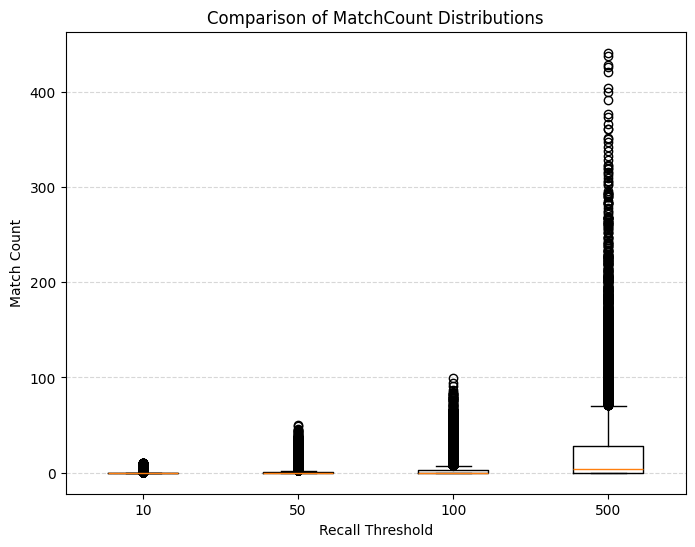

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

FOLDER = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/Dis_embedding_nn/"


files = {
    "10": "matching_summary_Distnace_10.csv",
    "50": "matching_summary_Distnace_50.csv",
    "100": "matching_summary_Distnace_100.csv",
    "500": "matching_summary_Distnace_500.csv"
}

data = []
labels = []

for label, filename in files.items():
    path = os.path.join(FOLDER, filename)
    df = pd.read_csv(path)

    if "MatchCount" not in df.columns:
        raise ValueError(f"MatchCount column missing in {filename}")

    data.append(df["MatchCount"].dropna())
    labels.append(label)

# Create box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)
plt.xlabel("Recall Threshold")
plt.ylabel("Match Count")
plt.title("Comparison of MatchCount Distributions")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


/tmp/ipykernel_76894/2506119227.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


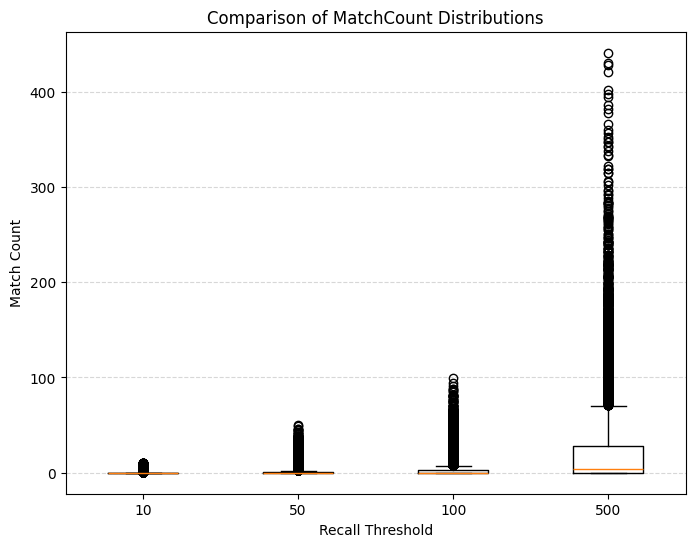

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt

FOLDER = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/Distance"

files = {
    "10": "matching_summary_Distnace_10.csv",
    "50": "matching_summary_Distnace_50.csv",
    "100": "matching_summary_Distnace_100.csv",
    "500": "matching_summary_Distnace_500.csv"
}

data = []
labels = []

for label, filename in files.items():
    path = os.path.join(FOLDER, filename)
    df = pd.read_csv(path)

    if "MatchCount" not in df.columns:
        raise ValueError(f"MatchCount column missing in {filename}")

    data.append(df["MatchCount"].dropna())
    labels.append(label)

# Create box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)
plt.xlabel("Recall Threshold")
plt.ylabel("Match Count")

plt.title("Comparison of MatchCount Distributions")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


/tmp/ipykernel_83876/242851536.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


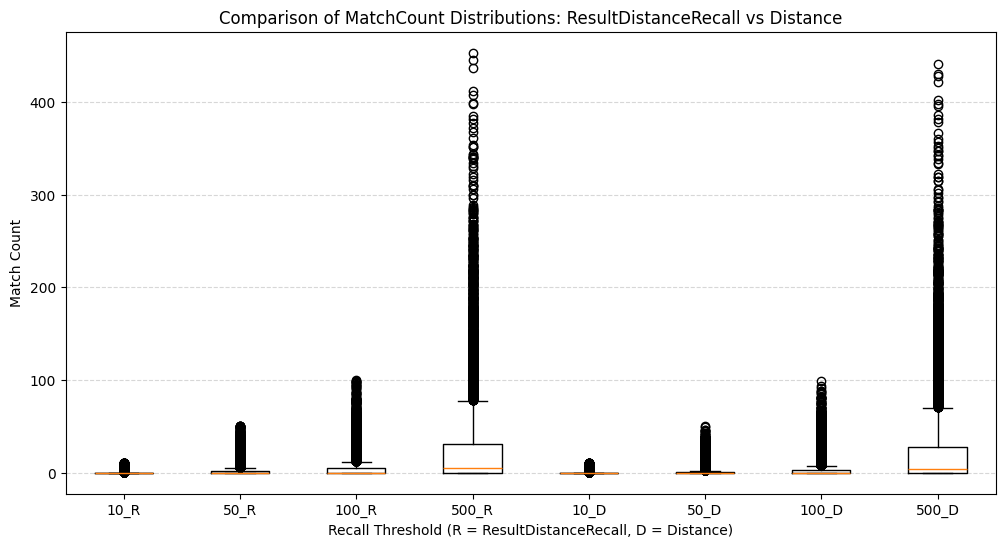

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folders
FOLDER1 = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/ResultDistanceRecall"
FOLDER2 = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/Distance"

# Files with thresholds
files1 = {
    "10": "matching_summary_10.csv",
    "50": "matching_summary_50.csv",
    "100": "matching_summary_100.csv",
    "500": "matching_summary_500.csv"
}

files2 = {
    "10": "matching_summary_Distnace_10.csv",
    "50": "matching_summary_Distnace_50.csv",
    "100": "matching_summary_Distnace_100.csv",
    "500": "matching_summary_Distnace_500.csv"
}

data = []
labels = []

# Load first set (ResultDistanceRecall)
for label, filename in files1.items():
    path = os.path.join(FOLDER1, filename)
    df = pd.read_csv(path)
    data.append(df["MatchCount"].dropna())
    labels.append(f"{label}_R")  # R = ResultDistanceRecall

# Load second set (Distance)
for label, filename in files2.items():
    path = os.path.join(FOLDER2, filename)
    df = pd.read_csv(path)
    data.append(df["MatchCount"].dropna())
    labels.append(f"{label}_D")  # D = Distance

# Create combined box plot
plt.figure(figsize=(12, 6))
plt.boxplot(data, labels=labels)
plt.xlabel("Recall Threshold (R = ResultDistanceRecall, D = Distance)")
plt.ylabel("Match Count")
plt.title("Comparison of MatchCount Distributions: ResultDistanceRecall vs Distance")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


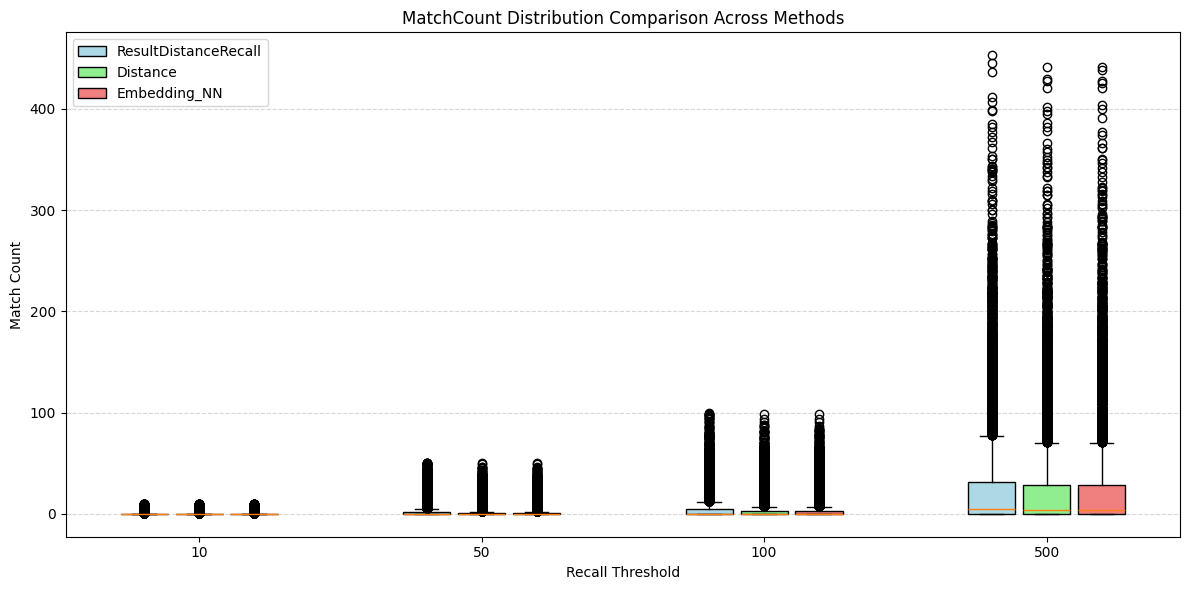

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# Folders
# =======================
FOLDER_R = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/ResultDistanceRecall"
FOLDER_D = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/Distance"
FOLDER_E = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/Dis_embedding_nn"

# =======================
# Recall thresholds
# =======================
thresholds = ["10", "50", "100", "500"]

files_R = {t: f"matching_summary_{t}.csv" for t in thresholds}
files_D = {t: f"matching_summary_Distnace_{t}.csv" for t in thresholds}
files_E = {t: f"matching_summary_Distnace_{t}.csv" for t in thresholds}

# =======================
# Load data
# =======================
data_R = []
data_D = []
data_E = []

for t in thresholds:
    df_R = pd.read_csv(os.path.join(FOLDER_R, files_R[t]))
    df_D = pd.read_csv(os.path.join(FOLDER_D, files_D[t]))
    df_E = pd.read_csv(os.path.join(FOLDER_E, files_E[t]))

    data_R.append(df_R["MatchCount"].dropna())
    data_D.append(df_D["MatchCount"].dropna())
    data_E.append(df_E["MatchCount"].dropna())

# =======================
# Plot grouped boxplots
# =======================
plt.figure(figsize=(12, 6))

positions = []
pos = 1
for _ in thresholds:
    positions.extend([pos, pos + 0.35, pos + 0.7])  # R, D, E
    pos += 1.8

# Flatten data
all_data = []
for r, d, e in zip(data_R, data_D, data_E):
    all_data.extend([r, d, e])

box = plt.boxplot(
    all_data,
    positions=positions,
    widths=0.3,
    patch_artist=True,
    showfliers=True
)

# =======================
# Colors
# =======================
colors = ["lightblue", "lightgreen", "lightcoral"] * len(thresholds)
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

# =======================
# Axes & Labels
# =======================
group_positions = [1.35, 3.15, 4.95, 6.75]
plt.xticks(group_positions, thresholds)
plt.xlabel("Recall Threshold")
plt.ylabel("Match Count")
plt.title("MatchCount Distribution Comparison Across Methods")

# =======================
# Legend
# =======================
plt.legend(
    [box["boxes"][0], box["boxes"][1], box["boxes"][2]],
    ["ResultDistanceRecall", "Distance", "Embedding_NN"],
    loc="upper left"
)

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


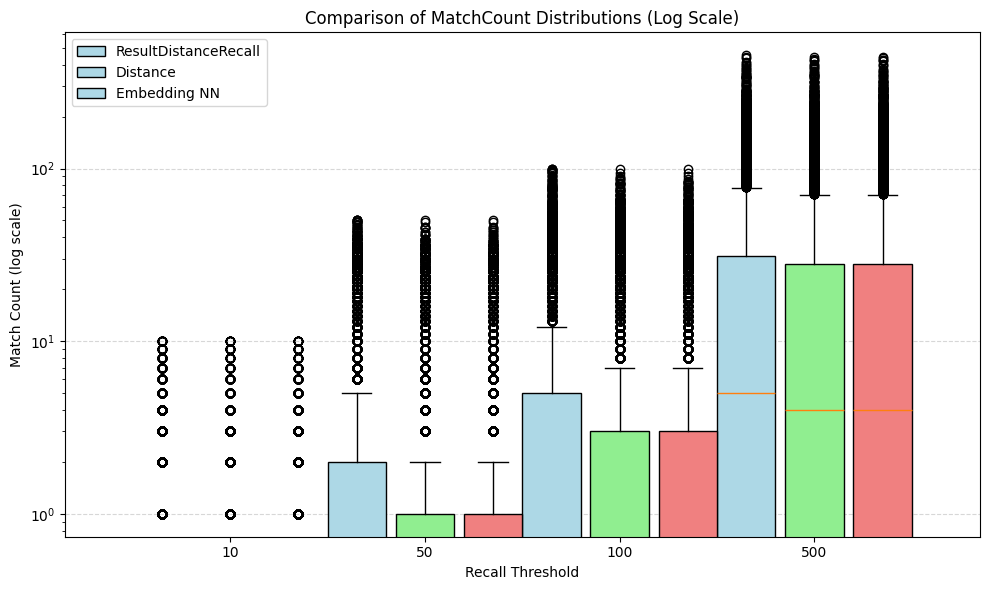

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# Folders
# =======================
FOLDER_R = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/ResultDistanceRecall"
FOLDER_D = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/Distance"
FOLDER_E = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/Dis_embedding_nn"

# =======================
# Recall thresholds
# =======================
thresholds = ["10", "50", "100", "500"]

files_R = {t: f"matching_summary_{t}.csv" for t in thresholds}
files_D = {t: f"matching_summary_Distnace_{t}.csv" for t in thresholds}
files_E = {t: f"matching_summary_Distnace_{t}.csv" for t in thresholds}

# =======================
# Load data
# =======================
data_R = [pd.read_csv(os.path.join(FOLDER_R, files_R[t]))["MatchCount"].dropna() for t in thresholds]
data_D = [pd.read_csv(os.path.join(FOLDER_D, files_D[t]))["MatchCount"].dropna() for t in thresholds]
data_E = [pd.read_csv(os.path.join(FOLDER_E, files_E[t]))["MatchCount"].dropna() for t in thresholds]

# =======================
# Plot (log scale)
# =======================
plt.figure(figsize=(10, 6))

pos_R = [1, 2, 3, 4]
pos_D = [p + 0.35 for p in pos_R]
pos_E = [p + 0.70 for p in pos_R]

plt.boxplot(
    data_R,
    positions=pos_R,
    widths=0.3,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue")
)

plt.boxplot(
    data_D,
    positions=pos_D,
    widths=0.3,
    patch_artist=True,
    boxprops=dict(facecolor="lightgreen")
)

plt.boxplot(
    data_E,
    positions=pos_E,
    widths=0.3,
    patch_artist=True,
    boxprops=dict(facecolor="lightcoral")
)

# =======================
# Axes & labels
# =======================
plt.xticks([p + 0.35 for p in pos_R], thresholds)
plt.xlabel("Recall Threshold")
plt.ylabel("Match Count (log scale)")
plt.yscale("log")
plt.title("Comparison of MatchCount Distributions (Log Scale)")

# =======================
# Legend
# =======================
plt.legend(
    ["ResultDistanceRecall", "Distance", "Embedding NN"],
    loc="upper left"
)

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


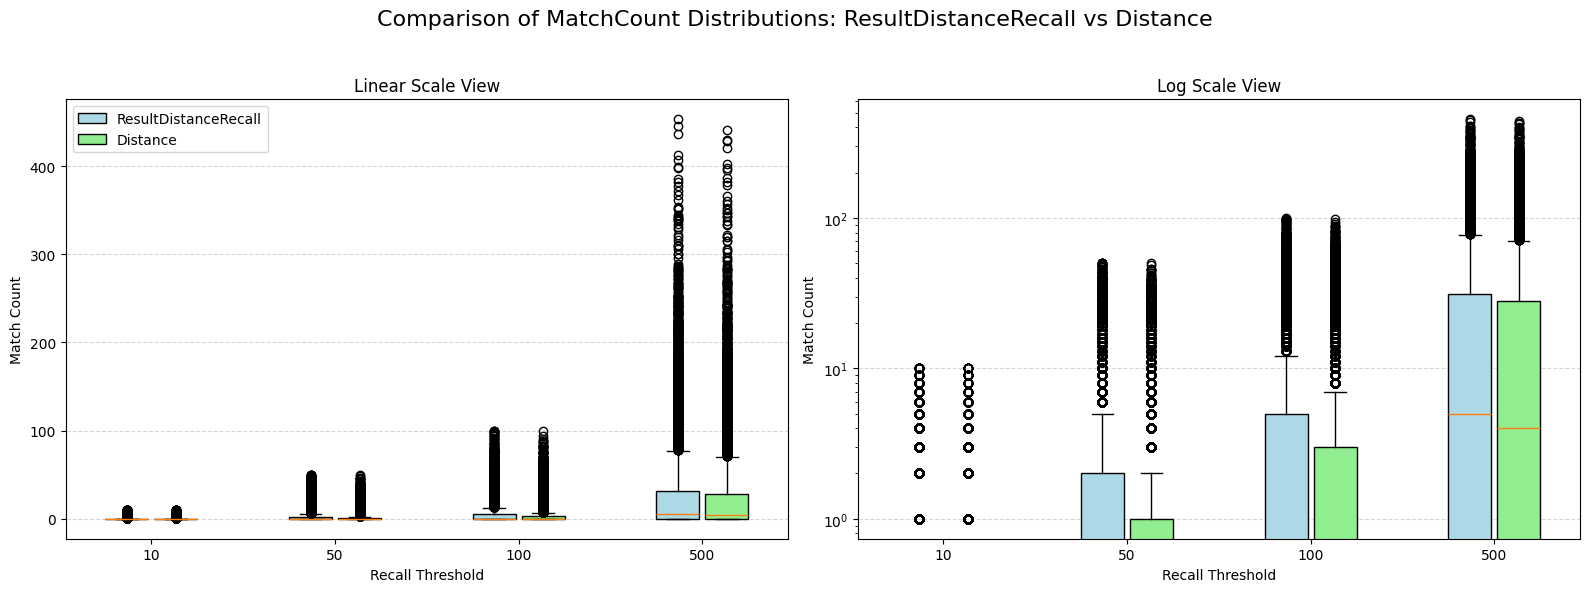

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folders
FOLDER1 = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/ResultDistanceRecall"
FOLDER2 = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/Distance"

# Files with thresholds
thresholds = ["10", "50", "100", "500"]
files1 = {t: f"matching_summary_{t}.csv" for t in thresholds}
files2 = {t: f"matching_summary_Distnace_{t}.csv" for t in thresholds}

# Load data
data_R = []
data_D = []

for t in thresholds:
    df1 = pd.read_csv(os.path.join(FOLDER1, files1[t]))
    df2 = pd.read_csv(os.path.join(FOLDER2, files2[t]))

    data_R.append(df1["MatchCount"].dropna())
    data_D.append(df2["MatchCount"].dropna())

# Create figure with 2 subplots (linear and log scale)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, ax in enumerate(axes):
    # positions for boxes
    positions = []
    pos = 1
    for _ in thresholds:
        positions.extend([pos, pos + 0.4])  # R, D side by side
        pos += 1.5  # space between groups

    # Flatten data for plotting
    all_data = []
    for r, d in zip(data_R, data_D):
        all_data.append(r)
        all_data.append(d)

    # Create boxes
    box = ax.boxplot(all_data, positions=positions, widths=0.35, patch_artist=True)

    # Colors for R and D
    colors = ["lightblue", "lightgreen"] * len(thresholds)
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # X-axis labels in the center of each group
    group_positions = [1.2, 2.7, 4.2, 5.7]
    ax.set_xticks(group_positions)
    ax.set_xticklabels(thresholds)
    ax.set_xlabel("Recall Threshold")
    ax.set_ylabel("Match Count")
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    # Set log scale for the second subplot
    if i == 1:
        ax.set_yscale("log")
        ax.set_title("Log Scale View")
    else:
        ax.set_title("Linear Scale View")

# Add a shared legend
axes[0].legend([box["boxes"][0], box["boxes"][1]], ["ResultDistanceRecall", "Distance"], loc="upper left")

plt.suptitle("Comparison of MatchCount Distributions: ResultDistanceRecall vs Distance", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


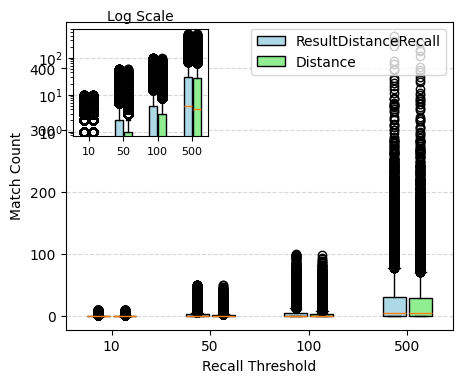

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Folders
FOLDER1 = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/ResultDistanceRecall"
FOLDER2 = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/Distance"

# Files with thresholds
thresholds = ["10", "50", "100", "500"]
files1 = {t: f"matching_summary_{t}.csv" for t in thresholds}
files2 = {t: f"matching_summary_Distnace_{t}.csv" for t in thresholds}

# Load data
data_R = []
data_D = []

for t in thresholds:
    df1 = pd.read_csv(os.path.join(FOLDER1, files1[t]))
    df2 = pd.read_csv(os.path.join(FOLDER2, files2[t]))

    data_R.append(df1["MatchCount"].dropna())
    data_D.append(df2["MatchCount"].dropna())

# Create main figure
fig, ax = plt.subplots(figsize=(5, 4))

# positions for boxes
positions = []
pos = 1
for _ in thresholds:
    positions.extend([pos, pos + 0.4])  # R, D side by side
    pos += 1.5  # space between groups

# Flatten data for plotting
all_data = []
for r, d in zip(data_R, data_D):
    all_data.append(r)
    all_data.append(d)

# Create main boxplot (linear scale)
box = ax.boxplot(all_data, positions=positions, widths=0.35, patch_artist=True)

# Colors for R and D
colors = ["lightblue", "lightgreen"] * len(thresholds)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# X-axis labels in the center of each group
group_positions = [1.2, 2.7, 4.2, 5.7]
ax.set_xticks(group_positions)
ax.set_xticklabels(thresholds)
ax.set_xlabel("Recall Threshold")
ax.set_ylabel("Match Count")
#ax.set_title("Comparison of MatchCount Distributions: ResultDistanceRecall vs Distance")
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Legend
ax.legend([box["boxes"][0], box["boxes"][1]], ["ResultDistanceRecall", "Distance"], loc="upper right")

# Create inset axes for log-scale view
ax_inset = inset_axes(ax, width="35%", height="35%", loc="upper left")
box_inset = ax_inset.boxplot(all_data, positions=positions, widths=0.35, patch_artist=True)

# Apply colors to inset
for patch, color in zip(box_inset['boxes'], colors):
    patch.set_facecolor(color)

ax_inset.set_yscale("log")
ax_inset.set_xticks(group_positions)
ax_inset.set_xticklabels(thresholds, fontsize=8)
ax_inset.set_title("Log Scale", fontsize=10)
ax_inset.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


In [14]:
# This is actually a plot for recall and distance collective and distance alone just to show that how mush of the keys have been identified during the tree traverisng
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... [Your data loading code remains the same] ...

# 1. Set the style for a clean look
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize=(4, 3))

# 2. Define high-visibility colors
# Using more saturated colors similar to your reference image
vibrant_colors = ["#1E90FF", "#228B22"] # DodgerBlue and ForestGreen

# 3. Create the boxplot
ax = sns.boxplot(
    data=df_all, 
    x="Threshold", 
    y="MatchCount", 
    hue="Type", 
    palette=vibrant_colors,
    showfliers=True,
    width=0.6,           # Makes bars slimmer to create space between groups
    gap=0.15,            # Creates a physical gap between the two bars in a group
    linewidth=1.5,       # Makes the box outlines thicker and more visible
    fliersize=4          # Adjusts size of outlier dots
)

# 4. Enhance the visual outline
# This adds a black edge to every box to make them "pop" against the white background
for patch in ax.patches:
    patch.set_edgecolor('black')

# 5. Handle Log Scale and Visibility
plt.yscale("log")

# Setting the bottom limit to 0.8 is crucial so that boxes 
# with a value of 1 aren't cut off by the X-axis line.
plt.ylim(bottom=0.8) 

# 6. Labels and Legend
plt.xlabel("Top-K", fontsize=11, fontweight='bold')
plt.ylabel("Match Count (log scale)", fontsize=11, fontweight='bold')

plt.legend(
    title="", 
    loc='upper left', 
    frameon=True, 
    fontsize='medium'
)

plt.tight_layout()
plt.show()

NameError: name 'df_all' is not defined

<Figure size 400x300 with 0 Axes>

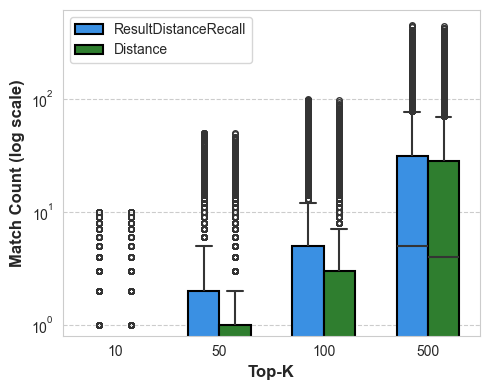

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Folders and files
# -----------------------------
FOLDER1 = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/ResultDistanceRecall"
FOLDER2 = "/data3/Adeel/PaperResultsForQweryAware/RecallResult/Distance"

thresholds = ["10", "50", "100", "500"]
files1 = {t: f"matching_summary_{t}.csv" for t in thresholds}
files2 = {t: f"matching_summary_Distnace_{t}.csv" for t in thresholds}

# -----------------------------
# Load and combine data
# -----------------------------
records = []

for t in thresholds:
    df1 = pd.read_csv(os.path.join(FOLDER1, files1[t]))
    df2 = pd.read_csv(os.path.join(FOLDER2, files2[t]))

    for val in df1["MatchCount"].dropna():
        records.append({"Threshold": t, "MatchCount": val, "Type": "ResultDistanceRecall"})
    for val in df2["MatchCount"].dropna():
        records.append({"Threshold": t, "MatchCount": val, "Type": "Distance"})

df_all = pd.DataFrame(records)

# -----------------------------
# Plot
# -----------------------------
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize=(5, 4))

# Vibrant colors
vibrant_colors = ["#1E90FF", "#228B22"]  # DodgerBlue, ForestGreen

ax = sns.boxplot(
    data=df_all,
    x="Threshold",
    y="MatchCount",
    hue="Type",
    palette=vibrant_colors,
    showfliers=True,
    width=0.6,
    linewidth=1.5,
    fliersize=4
)

# Black edges for boxes
for patch in ax.patches:
    patch.set_edgecolor('black')

# Log scale
plt.yscale("log")
plt.ylim(bottom=0.8)

# Labels and legend
plt.xlabel("Top-K", fontsize=12, fontweight='bold')
plt.ylabel("Match Count (log scale)", fontsize=12, fontweight='bold')
plt.legend(title="", loc='upper left', frameon=True, fontsize='medium')

plt.tight_layout()
plt.show()


In [67]:
# Time comparasion of proposed approach vs rest of other for graph traversing to the layer o and proposed tree traversing 
import pandas as pd
df_paper = pd.read_csv('/data3/Adeel/PaperResultsForQweryAware/PaperResultForTimeForgrpahgreedysearch/Paper.csv', nrows=10000)

# Load trip click CSV
df_trip_click = pd.read_csv('/data3/Adeel/PaperResultsForQweryAware/TripClickResultForGreedySearch/TripClick.csv',  nrows=1000)

In [71]:
# Rename columns
df_paper.rename(columns={
    'ACORNgamma': 'Acorn-gamma',
    'Query_aware_quantized20': 'QA-quantized-20',
    'Query_aware': 'QA',
    'Postfitlering': 'PF',
    'ACORN1': 'Acorn1',
    'Query_aware_quantized': 'QA-quantized',
    'time': 'Navix'   # keeps same name, optional
}, inplace=True)

# Check new column names
print(df_paper.columns)

Index(['Acorn-gamma', 'QA-quantized-20', 'QA', 'PF', 'Acorn1', 'QA-quantized',
       'Navix'],
      dtype='object')


In [72]:
df_paper

,Acorn-gamma,QA-quantized-20,QA,PF,Acorn1,QA-quantized,Navix
0,0.202,0.000,0.000,0.120,0.449,0.000,0.065
1,0.278,0.000,0.000,0.069,0.296,0.000,0.044
2,0.215,0.000,0.000,0.028,0.479,0.000,0.026
3,0.301,0.000,0.000,0.072,0.330,0.000,0.025
4,0.219,0.000,0.000,0.080,0.442,0.000,0.033
...,...,...,...,...,...,...,...
9995,0.221,0.148,0.434,0.041,0.369,0.483,0.028
9996,0.109,0.119,0.817,0.044,0.376,0.160,0.034
9997,0.140,0.123,0.888,0.034,0.559,0.148,0.017
9998,0.079,0.106,0.348,0.090,0.329,0.205,0.023


In [73]:
df_trip_click

,navix_greedy_search_time,ACORNgamma,Query_aware_quantizedfull_quantized,Postfitlering,Query_aware_quantizedfull,ACORN1
0,0.151,0.406,0.000,0.128,0.000,0.829
1,0.110,0.448,0.000,0.071,0.000,0.748
2,0.110,0.323,0.000,0.079,0.000,0.953
3,0.112,0.391,0.000,0.076,0.000,1.002
4,0.115,0.563,0.000,0.120,0.000,1.035
...,...,...,...,...,...,...
995,0.094,0.342,0.034,0.098,0.056,1.769
996,0.117,0.299,0.158,0.141,0.147,0.619
997,0.054,0.272,0.172,0.035,0.000,1.234
998,0.087,0.269,0.000,0.169,0.055,1.383


In [74]:
df_trip_click.rename(columns={
    'ACORNgamma': 'Acorn-gamma',
    'Query_aware_quantizedfull_quantized': 'QA-quantized-20',
    'Query_aware_quantizedfull': 'QA',
    'Postfitlering': 'PF',
    'ACORN1': 'Acorn1',
    'Query_aware_quantized': 'QA-quantized',
    'navix_greedy_search_time': 'Navix'   # keeps same name, optional
}, inplace=True)

# Check new column names
print(df_trip_click.columns)

Index(['Navix', 'Acorn-gamma', 'QA-quantized-20', 'PF', 'QA', 'Acorn1'], dtype='object')


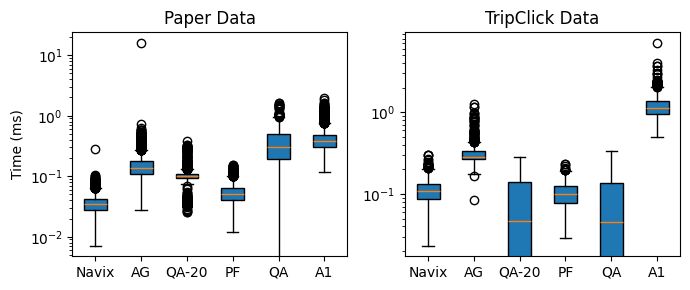

In [84]:
# Tree Exploration Time
import matplotlib.pyplot as plt

# Columns to plot
columns_to_plot = ['Navix', 'Acorn-gamma', 'QA-quantized-20', 'PF', 'QA', 'Acorn1']

# Shorter labels for x-axis
short_labels = ['Navix', 'AG', 'QA-20', 'PF', 'QA', 'A1']

# Create figure with 1 row, 2 columns (side by side)
plt.figure(figsize=(7, 3))

# Boxplot for Paper
plt.subplot(1, 2, 1)
plt.boxplot([df_paper[col].dropna() for col in columns_to_plot], patch_artist=True)
plt.xticks(range(1, len(short_labels)+1), short_labels)
plt.title('Paper Data')
plt.ylabel('Time (ms)')
plt.yscale('log')  # Logarithmic scale

# Boxplot for TripClick
plt.subplot(1, 2, 2)
plt.boxplot([df_trip_click[col].dropna() for col in columns_to_plot], patch_artist=True)
plt.xticks(range(1, len(short_labels)+1), short_labels)
plt.title('TripClick Data')
plt.yscale('log')  # Logarithmic scale

plt.tight_layout()
plt.show()
